In [5]:
!pip install tensorflow
!pip install numpy==1.16.5
!pip install --upgrade tensorflow keras

  Using cached numpy-1.16.5.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\users\roshini\anaconda3\lib\site-packages\numpy-1.24.4.dist-info\
   from C:\Users\ROSHINI\anaconda3\Lib\site-packages\~umpy-1.24.4.dist-info
  Moving to c:\users\roshini\anaconda3\lib\site-packages\numpy\
   from C:\Users\ROSHINI\anaconda3\Lib\site-packages\~-mpy
  Moving to c:\users\roshini\anaconda3\scripts\f2py.exe
   from C:\Users\ROSHINI\AppData\Local\Temp\pip-uninstall-ew7y53zg\f2py.exe


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [264 lines of output]
  Running from numpy source directory.
  C:\Users\ROSHINI\AppData\Local\Temp\pip-install-x0fhj6ei\numpy_948a548fca2942a284f44d25b772830b\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\ROSHINI\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ROSHINI\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blis not found in ['C:\\Users\\ROSHINI\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ROSHINI\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:
  No m

  Using cached keras-3.0.1-py3-none-any.whl (999 kB)


In [6]:
!pip install opencv-python

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [8]:
#loading data and pre processing
train_dir = r'C:\Users\ROSHINI\Desktop\Final Project_ML_RoshiniBandi\MRI\MRI\Training'
validation_dir = r'C:\Users\ROSHINI\Desktop\Final Project_ML_RoshiniBandi\MRI\MRI\Testing'
test_dir = r'C:\Users\ROSHINI\Desktop\Final Project_ML_RoshiniBandi\MRI\MRI\Testing'


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='categorical')


Found 8582 images belonging to 4 classes.
Found 1705 images belonging to 4 classes.
Found 1705 images belonging to 4 classes.


In [9]:
#CNN definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax') # 8 classes - 4 for brain
])


In [10]:
#Compling
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [11]:
#training
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # depends on your dataset
    epochs=5,
    validation_data=validation_generator,
    validation_steps=15)  # depends on your dataset


Epoch 1/5


100/100 [==============================] - 77s 738ms/step - loss: 1.0151 - accuracy: 0.5985 - val_loss: 0.9287 - val_accuracy: 0.6667
Epoch 2/5
100/100 [==============================] - 67s 669ms/step - loss: 0.5925 - accuracy: 0.7669 - val_loss: 1.0930 - val_accuracy: 0.6900
Epoch 3/5
100/100 [==============================] - 62s 623ms/step - loss: 0.5196 - accuracy: 0.7915 - val_loss: 0.8698 - val_accuracy: 0.7000
Epoch 4/5
100/100 [==============================] - 59s 594ms/step - loss: 0.3854 - accuracy: 0.8495 - val_loss: 0.8443 - val_accuracy: 0.7767
Epoch 5/5
100/100 [==============================] - 58s 580ms/step - loss: 0.3387 - accuracy: 0.8688 - val_loss: 1.1272 - val_accuracy: 0.7667


In [12]:
#evaluate
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)


35/35 [==============================] - 16s 467ms/step - loss: 0.8856 - accuracy: 0.7953
Test accuracy: 0.7953079342842102


In [16]:
#model prediction
image_path=r'C:\Users\ROSHINI\Desktop\Final Project_ML_RoshiniBandi\MRI\MRI\Testing\no_tumor\image(61).jpg'
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class

# Example usage
predicted_class = predict_image(image_path)
print(predicted_class)

1/1 [==============================] - 0s 38ms/step
[2]


In [17]:
#predicting the output class
if predicted_class[0] == 0:
  print("Glioma Tumora was detected in the brain")
elif predicted_class[0] == 1:
  print("Meningioma Tumor was detected in the brain")
elif predicted_class[0] == 2:
  print("No tumor was detected in the brain")
elif predicted_class[0] == 3:
  print("Pituitary Tumor was detected in the brain")

No tumor was detected in the brain


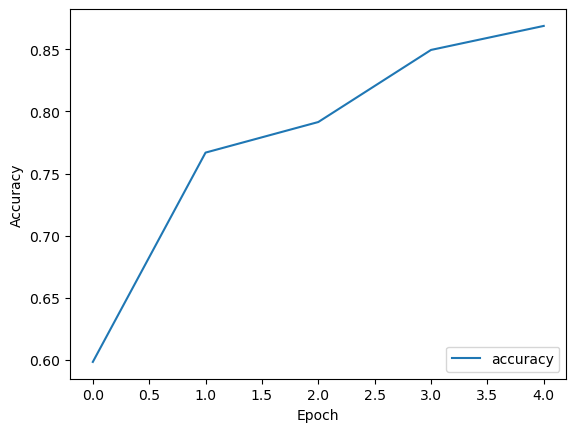

In [18]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()